<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import neighbors
## Initialize with default parameters
knn = neighbors.KNeighborsClassifier()
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Initialize wiht K = 15 and all other hyperparameters as result
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
#examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Initialize wiht K = 15 and all other hyperparameters as result
knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights="distance")
#examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [ ]:
## KNN
from sklearn import neighbors, datasets, model_selection

cancer = datasets.load_breast_cancer()
y = cancer.target
X = cancer.data

knn = neighbors.KNeighborsClassifier()

In [ ]:
## 10 fold cross validation
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(cv)

[0.91666667 0.85       0.91666667 0.94736842 0.94594595 0.94444444
 0.97222222 0.92105263 0.96969697 0.97142857]


In [ ]:
print(round(cv.mean(),2))

0.94


In [ ]:
## 10 fold cross validation
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(cv)
print(round(cv.mean(),2))

[0.85       0.82926829 0.91891892 0.94736842 0.94736842 0.94444444
 0.97222222 0.94594595 0.96969697 0.94594595]
0.93


In [ ]:
def evaluate_knn(k):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)

  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
  print(round(cv.mean(),2))

evaluate_knn(k=7)
evaluate_knn(k=3)
evaluate_knn(k=1)

0.93
0.93
0.92


In [ ]:
## 10 fold cross validation
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(cv)
print(round(cv.mean(),2))

[0.91666667 0.85       0.91891892 0.94736842 0.94594595 0.94444444
 0.94594595 0.92105263 0.94285714 0.97142857]
0.93


In [ ]:
## Grid search

from sklearn import neighbors, datasets, model_selection

cancer = datasets.load_breast_cancer()
y = cancer.target
X = cancer.data

## Hyperparameter grid
grid = {'k': [1,3,5,7]}

In [ ]:
for k in grid['k']:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)

  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

  cv_mean = round(cv.mean(), 2)

  print('Wik k = {}, mean percision = {}'.format(k, cv_mean))
  print(knn.get_params())

Wik k = 1, mean percision = 0.92
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Wik k = 3, mean percision = 0.93
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Wik k = 5, mean percision = 0.94
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wik k = 7, mean percision = 0.93
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [ ]:
## Hyperparameter grid
grid = {'k': [1,3,5,7],
        'weight_function': ['uniform', 'distance']}


for k in grid['k']:
  for weight_function in grid['weight_function']:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)
    cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
    cv_mean = round(cv.mean(), 2)

    print('Wik k = {} and weight function {}, mean percision = {}'.format(k, weight_function, cv_mean))
    print(knn.get_params())

Wik k = 1 and weight function uniform, mean percision = 0.92
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Wik k = 1 and weight function distance, mean percision = 0.92
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Wik k = 3 and weight function uniform, mean percision = 0.93
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Wik k = 3 and weight function distance, mean percision = 0.93
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Wik k = 5 and weight function uniform, mean percision = 0.94
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 

In [ ]:
## GridsearchCV

from sklearn import neighbors, datasets, model_selection

cancer = datasets.load_breast_cancer()
y = cancer.target
X = cancer.data

knn = neighbors.KNeighborsClassifier()

grid = {'n_neighbors': [1,3,5,7],
        'weights': ['uniform', 'distance']}

## Gric search parameter
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)
gscv.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [ ]:
print(gscv.cv_results_)

{'mean_fit_time': array([0.00114713, 0.00115337, 0.00114379, 0.0012929 , 0.00112789,
       0.00114172, 0.00115366, 0.00113721]), 'std_fit_time': array([3.77857270e-05, 6.03343358e-05, 6.44717695e-05, 2.58848973e-04,
       1.63155845e-05, 3.44928407e-05, 4.31284382e-05, 1.58370966e-05]), 'mean_score_time': array([0.00269403, 0.00141304, 0.00271444, 0.00163155, 0.00281975,
       0.0014735 , 0.00273304, 0.00163701]), 'std_score_time': array([2.27695590e-04, 1.00611513e-04, 1.34117849e-04, 3.25580064e-04,
       2.82501820e-04, 7.92367962e-05, 8.01922441e-05, 4.34885232e-04]), 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False],
  

In [ ]:

import pandas as pd

# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)

# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935549
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931078
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930463
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928752
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928438


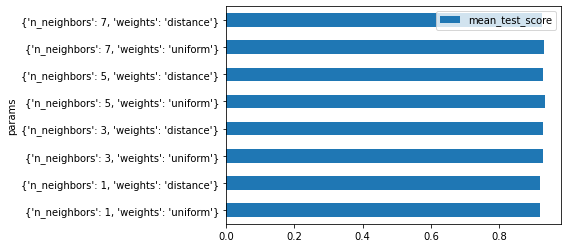

In [ ]:
# visualize the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

In [ ]:
## Support vector machince
from sklearn import datasets, svm, model_selection
digits = datasets.load_digits()
y = digits.target
X = digits.data

clr = svm.SVC(gamma='scale')
grid = [{'kernel':['linear']},
        {'kernel': ['poly'], 'degree':[2,3,4]}]

cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid, scoring='accuracy', cv=10)

cv_spec.fit(X,y)

print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
cv_spec.cv_results_['mean_test_score']

array([0.96048727, 0.97049969, 0.97773433, 0.97328367])

In [ ]:
cv_spec.cv_results_['params']

[{'kernel': 'linear'},
 {'degree': 2, 'kernel': 'poly'},
 {'degree': 3, 'kernel': 'poly'},
 {'degree': 4, 'kernel': 'poly'}]

In [ ]:
results = pd.DataFrame(cv_spec.cv_results_)
print(results.loc[:, ['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


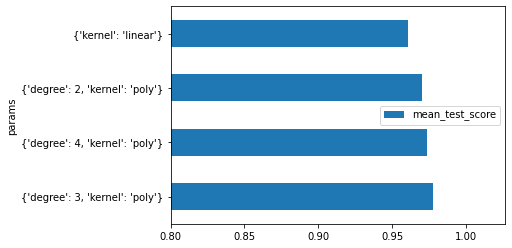

In [ ]:
(results.loc[:, ['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).plot.barh(x='params', xlim=(0.8)))

In [ ]:
## RandomSearchCV

from sklearn import datasets

# import data
digits = datasets.load_digits()

# target
y = digits.target

# features
X = digits.data

from sklearn import ensemble

# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [ ]:

# how many features do we have in our dataset?
n_features = X.shape[1]

print(n_features)

64


In [ ]:
from scipy import stats
import numpy as np
np.random.seed(100)

# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=n_features)
}

In [ ]:
from sklearn import model_selection

# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)

In [ ]:
# start the process
rscv.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
import pandas as pd

# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)

# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]

# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')

# remove duplicates
distinct_results.drop_duplicates(inplace=True)

# look at the top 5 best hyperparamaterizations
print(distinct_results.sort_values('mean_test_score', ascending=False).head(5))

                                         params  mean_test_score
3     {'criterion': 'gini', 'max_features': 11}         0.940470
48     {'criterion': 'gini', 'max_features': 4}         0.939913
19     {'criterion': 'gini', 'max_features': 5}         0.937700
14     {'criterion': 'gini', 'max_features': 3}         0.937694
21  {'criterion': 'entropy', 'max_features': 8}         0.936582


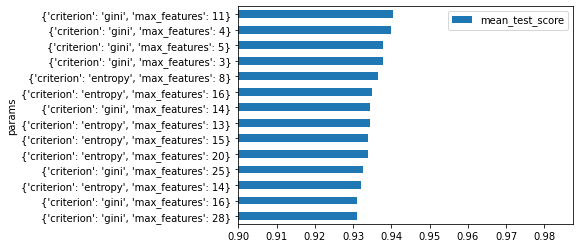

In [ ]:

# top performing models
distinct_results[distinct_results.mean_test_score > 0.93].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.9))

In [ ]:
## Mushroom classification
import pandas as pd
mushrooms = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter08/Dataset/agaricus-lepiota.data")
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [ ]:
y_raw = mushrooms.iloc[:,0]
X_raw = mushrooms.iloc[:,1:]
# code p into 1 e into 0
y = (y_raw == 'p') * 1

In [ ]:
# one hot encoding x feature
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()

encoder.fit(X_raw)

X = encoder.transform(X_raw).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Initialize the classifier.
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

#Conduct a grid search.
from sklearn import model_selection
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, cv=5, scoring='accuracy')
gscv.fit(X,y)
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

#Conduct a random search.
from scipy import stats
max_features = X.shape[1]
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=max_features)
}
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=100)
rscv.fit(X,y)
results = pd.DataFrame(rscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,1.082610,0.122526,0.016687,0.000561,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,1
41,1.086183,0.130390,0.016952,0.000938,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,1
29,1.138543,0.141717,0.016879,0.000791,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,1
6,1.033734,0.118530,0.017404,0.000792,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,1
27,0.708563,0.053016,0.016660,0.000811,gini,64,"{'criterion': 'gini', 'max_features': 64}",0.963077,1.0,0.996308,1.0,0.754310,0.942739,0.095233,5
10,1.111873,0.131394,0.017387,0.000831,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.000000,1.0,0.996308,1.0,0.693350,0.937931,0.122299,6
46,1.094710,0.121820,0.016692,0.001330,gini,107,"{'criterion': 'gini', 'max_features': 107}",1.000000,1.0,0.996308,1.0,0.693350,0.937931,0.122299,6
34,0.722090,0.055410,0.016599,0.000561,gini,65,"{'criterion': 'gini', 'max_features': 65}",0.921231,1.0,0.996308,1.0,0.754310,0.934370,0.094916,8
15,0.249438,0.007650,0.019491,0.000587,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.843077,1.0,1.000000,1.0,0.815887,0.931793,0.083978,9
18,0.248852,0.007679,0.019722,0.000763,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.843077,1.0,1.000000,1.0,0.815887,0.931793,0.083978,9


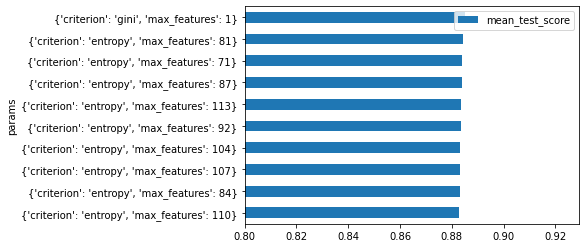

In [ ]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)

(
    results.sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .drop_duplicates()
    .head(10)
    .plot.barh(x='params', xlim=(0.8))
)